In [43]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pydotplus

In [2]:
df1 = pd.read_csv('ML case Study.csv',header=0)

In [3]:
df1.head()


,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
df2 = pd.read_csv('Colleges.csv',header=0)
df3 = pd.read_csv('Cities.csv',header=0)

In [5]:
df2.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [6]:
df3.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [9]:
# Structure
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier 1  22 non-null     object
 1   Tier 2  28 non-null     object
 2   Tier 3  19 non-null     object
dtypes: object(3)
memory usage: 800.0+ bytes


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Metrio City       9 non-null      object
 1   non-metro cities  8 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


# Data Preprocessing

In [15]:
#missing value check
df1.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

In [38]:
#Merging the Colleges data
df1 = df1.merge(df2[['Tier 1', 'Tier 2','Tier 3']], how='left', left_on='College', right_on='Tier 1')
                

In [48]:
print('Our df1 ML Case Study dataset contains '+format(df1.shape[0])+' rows and '+format(df1.shape[1]) )

Our df1 ML Case Study dataset contains 1589 rows and 11


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 0 to 1588
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
 8   Tier 1               578 non-null    object 
 9   Tier 2               578 non-null    object 
 10  Tier 3               489 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 149.0+ KB


In [52]:
print('Our df3 City dataset contains '+format(df3.shape[0])+' rows and '+format(df3.shape[1]))

Our df3 City dataset contains 9 rows and 2


In [53]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Metrio City       9 non-null      object
 1   non-metro cities  8 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


In [55]:
print('Our df2 College dataset contains '+format(df2.shape[0])+' rows and '+format(df2.shape[1]))
      

Our df2 College dataset contains 28 rows and 3


In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier 1  22 non-null     object
 1   Tier 2  28 non-null     object
 2   Tier 3  19 non-null     object
dtypes: object(3)
memory usage: 800.0+ bytes


In [57]:
df1.isnull().sum()

College                   0
City                      0
Role                      0
Previous CTC              0
Previous job change       0
Graduation Marks          0
EXP (Month)               0
CTC                       0
Tier 1                 1011
Tier 2                 1011
Tier 3                 1100
dtype: int64

In [84]:
df1 = df1.merge(df2[['Tier 1', 'Tier 2','Tier 3']], how='left', left_on='College', right_on='Tier 1')

In [109]:

df1['College type'] = df1.apply(
lambda row: 'Tier 1' if pd.notna(row['Tier 1']) else  'Tier 2' ,
axis=1
)

In [ ]:
df1['City Type'] = df1.apply(
lambda row: 'Metrio City' if pd.notna(row['Metrio City']) else 'non-metro cities',
axis=1
)


In [110]:
df1.to_csv('df1_with_College Type.csv', index=False)

In [133]:
# The City data is merged with 'City' column of ML data and adding new column 'City type
df1 = df1.merge(df3[['Metrio City','non-metro cities']], how='left', left_on='City', right_on='non-metro cities')
df1['City Type'] = df1.apply(
lambda row: 'non-metro cities' if pd.notna(row['non-metro cities']) else 'Metrio City',
axis=1
)

In [117]:
df1.head(5)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier 1_x,Tier 2_x,...,Tier 1_x,Tier 2_x,Tier 3_x,Tier 1_y,Tier 2_y,Tier 3_y,Tier 1,Tier 2,Tier 3,College type
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tier 2
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tier 2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tier 2
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tier 2
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,DTU,BIT Mesra,...,DTU,BIT Mesra,"Heritage Institute of Technology, Kolkata",DTU,BIT Mesra,"Heritage Institute of Technology, Kolkata",DTU,BIT Mesra,"Heritage Institute of Technology, Kolkata",Tier 1


In [118]:
df1 = df1.drop(columns='Tier 1')

In [119]:
df1 = df1.drop(columns='Tier 1_x')

In [121]:
df1 = df1.drop(columns='Tier 1_y')

In [122]:
df1 = df1.drop(columns='Tier 2')
df1 = df1.drop(columns='Tier 2_x')
df1 = df1.drop(columns='Tier 2_y')

In [123]:
df1 = df1.drop(columns='Tier 3')
df1 = df1.drop(columns='Tier 3_x')
df1 = df1.drop(columns='Tier 3_y')

In [124]:
df1.head(5)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College type
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,Tier 2
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,Tier 2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,Tier 2
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,Tier 2
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,Tier 1


In [125]:
df1.shape

(1589, 9)

In [126]:
category_counts = df1['College type'].value_counts()
print(category_counts)

Tier 2    1011
Tier 1     578
Name: College type, dtype: int64


In [134]:
df1.head(5)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College type,Metrio City_x,non-metro cities_x,Metrio City_y,non-metro cities_y,Metrio City,non-metro cities,City Type
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,Tier 2,Kolkata,Asansol,Kolkata,Asansol,Kolkata,Asansol,non-metro cities
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,Tier 2,Pune,Ajmer,Pune,Ajmer,Pune,Ajmer,non-metro cities
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,Tier 2,Hyderabad,Rajpur Sonarpur,Hyderabad,Rajpur Sonarpur,Hyderabad,Rajpur Sonarpur,non-metro cities
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,Tier 2,Pune,Ajmer,Pune,Ajmer,Pune,Ajmer,non-metro cities
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,Tier 1,Delhi,Durgapur,Delhi,Durgapur,Delhi,Durgapur,non-metro cities


In [143]:

df1 = df1.drop(columns='non-metro cities_y')

df1 = df1.drop(columns='Metrio City_y')


In [144]:
df1.head(5)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College type,City Type
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,Tier 2,non-metro cities
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,Tier 2,non-metro cities
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,Tier 2,non-metro cities
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,Tier 2,non-metro cities
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,Tier 1,non-metro cities


In [145]:


category_counts = df1['City Type'].value_counts()
print(category_counts)

Metrio City         817
non-metro cities    772
Name: City Type, dtype: int64


In [146]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 0 to 1588
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
 8   College type         1589 non-null   object 
 9   City Type            1589 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 136.6+ KB


In [147]:
#Creating Dummy data

categorical_column = ['College type','City Type','Role']

In [148]:
df1 = pd.get_dummies(df1, columns=categorical_column)

In [149]:
df1.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College type_Tier 1,College type_Tier 2,City Type_Metrio City,City Type_non-metro cities,Role_Executive,Role_Manager
0,SVNIT Surat,Asansol,55523.0,3,66,19,71406.58,0,1,0,1,0,1
1,NIT Bhopal,Ajmer,57081.0,1,84,18,68005.87,0,1,0,1,1,0
2,"IEM, Kolkata",Rajpur Sonarpur,60347.0,2,52,28,76764.02,0,1,0,1,1,0
3,"KIIT, Bhubaneswar",Ajmer,49010.0,2,81,33,82092.39,0,1,0,1,1,0
4,DTU,Durgapur,57879.0,4,74,32,73878.10,1,0,0,1,1,0


In [150]:
#Deleting less important column
df1 = df1.drop(columns='City')
df1 = df1.drop(columns='College')

In [151]:
df1.head()


,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College type_Tier 1,College type_Tier 2,City Type_Metrio City,City Type_non-metro cities,Role_Executive,Role_Manager
0,55523.0,3,66,19,71406.58,0,1,0,1,0,1
1,57081.0,1,84,18,68005.87,0,1,0,1,1,0
2,60347.0,2,52,28,76764.02,0,1,0,1,1,0
3,49010.0,2,81,33,82092.39,0,1,0,1,1,0
4,57879.0,4,74,32,73878.10,1,0,0,1,1,0


In [152]:
df1.dtypes

Previous CTC                  float64
Previous job change             int64
Graduation Marks                int64
EXP (Month)                     int64
CTC                           float64
College type_Tier 1             uint8
College type_Tier 2             uint8
City Type_Metrio City           uint8
City Type_non-metro cities      uint8
Role_Executive                  uint8
Role_Manager                    uint8
dtype: object

In [153]:
df1.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College type_Tier 1,College type_Tier 2,City Type_Metrio City,City Type_non-metro cities,Role_Executive,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.363751,0.636249,0.514160,0.485840,0.793581,0.206419
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.481230,0.481230,0.499957,0.499957,0.404862,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Univariate Analysis


In [156]:
display(df1["College type_Tier 1"].value_counts())
display(df1["College type_Tier 1"].value_counts(normalize=True))
print("Total- "+ str(df1["College type_Tier 1"].value_counts().sum()))

0    1011
1     578
Name: College type_Tier 1, dtype: int64

0    0.636249
1    0.363751
Name: College type_Tier 1, dtype: float64

Total- 1589


In [157]:
display(df1["College type_Tier 2"].value_counts())
display(df1["College type_Tier 2"].value_counts(normalize=True))
print("Total- "+ str(df1["College type_Tier 2"].value_counts().sum()))

1    1011
0     578
Name: College type_Tier 2, dtype: int64

1    0.636249
0    0.363751
Name: College type_Tier 2, dtype: float64

Total- 1589


In [160]:
display(df1["City Type_Metrio City"].value_counts())
display(df1["City Type_Metrio City"].value_counts(normalize=True))
print("Total- "+ str(df1["City Type_Metrio City"].value_counts().sum()))

1    817
0    772
Name: City Type_Metrio City, dtype: int64

1    0.51416
0    0.48584
Name: City Type_Metrio City, dtype: float64

Total- 1589


In [161]:
display(df1["City Type_non-metro cities"].value_counts())
display(df1["City Type_non-metro cities"].value_counts(normalize=True))
print("Total- "+ str(df1["City Type_non-metro cities"].value_counts().sum()))

0    817
1    772
Name: City Type_non-metro cities, dtype: int64

0    0.51416
1    0.48584
Name: City Type_non-metro cities, dtype: float64

Total- 1589


In [162]:
display(df1["Role_Executive"].value_counts())
display(df1["Role_Executive"].value_counts(normalize=True))
print("Total- "+ str(df1["Role_Executive"].value_counts().sum()))

1    1261
0     328
Name: Role_Executive, dtype: int64

1    0.793581
0    0.206419
Name: Role_Executive, dtype: float64

Total- 1589


In [163]:
display(df1["Role_Manager"].value_counts())
display(df1["Role_Manager"].value_counts(normalize=True))
print("Total- "+ str(df1["Role_Manager"].value_counts().sum()))

0    1261
1     328
Name: Role_Manager, dtype: int64

0    0.793581
1    0.206419
Name: Role_Manager, dtype: float64

Total- 1589


In [164]:
#Correlation Analysis
df1.corr()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College type_Tier 1,College type_Tier 2,City Type_Metrio City,City Type_non-metro cities,Role_Executive,Role_Manager
Previous CTC,1.000000,0.005756,-0.032976,0.119163,0.258000,-0.031366,0.031366,0.004644,-0.004644,-0.012321,0.012321
Previous job change,0.005756,1.000000,0.019267,0.023488,0.011370,0.045931,-0.045931,0.051670,-0.051670,0.017150,-0.017150
Graduation Marks,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.005666,-0.005666,-0.018616,0.018616,-0.017858,0.017858
EXP (Month),0.119163,0.023488,-0.057061,1.000000,0.301115,-0.003323,0.003323,-0.023613,0.023613,0.026751,-0.026751
CTC,0.258000,0.011370,-0.005450,0.301115,1.000000,0.019912,-0.019912,-0.020365,0.020365,-0.621311,0.621311
College type_Tier 1,-0.031366,0.045931,0.005666,-0.003323,0.019912,1.000000,-1.000000,0.002135,-0.002135,-0.015158,0.015158
College type_Tier 2,0.031366,-0.045931,-0.005666,0.003323,-0.019912,-1.000000,1.000000,-0.002135,0.002135,0.015158,-0.015158
City Type_Metrio City,0.004644,0.051670,-0.018616,-0.023613,-0.020365,0.002135,-0.002135,1.000000,-1.000000,0.048671,-0.048671
City Type_non-metro cities,-0.004644,-0.051670,0.018616,0.023613,0.020365,-0.002135,0.002135,-1.000000,1.000000,-0.048671,0.048671
Role_Executive,-0.012321,0.017150,-0.017858,0.026751,-0.621311,-0.015158,0.015158,0.048671,-0.048671,1.000000,-1.000000


## Compute the correlation coefficients

In [167]:
correlation_matrix = df1.corr()

In [168]:
correlation_with_target = correlation_matrix['Previous CTC']

In [169]:
print(correlation_with_target)

Previous CTC                  1.000000
Previous job change           0.005756
Graduation Marks             -0.032976
EXP (Month)                   0.119163
CTC                           0.258000
College type_Tier 1          -0.031366
College type_Tier 2           0.031366
City Type_Metrio City         0.004644
City Type_non-metro cities   -0.004644
Role_Executive               -0.012321
Role_Manager                  0.012321
Name: Previous CTC, dtype: float64


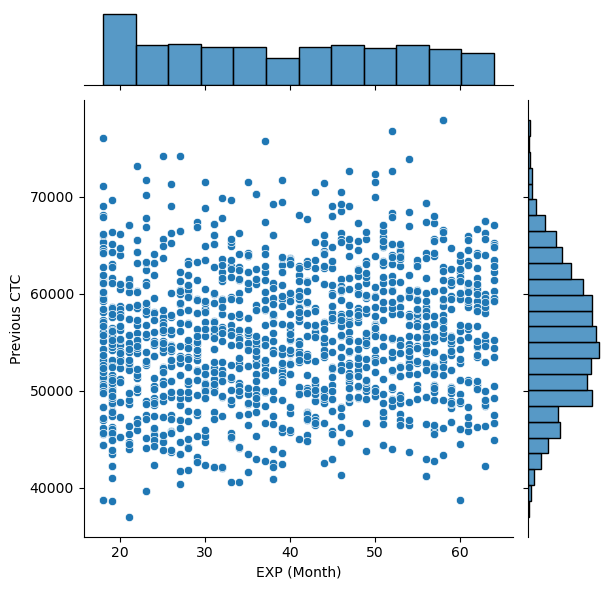

In [172]:
#Visualization of Positive correlated variables
sns.jointplot(x="EXP (Month)",y="Previous CTC", data=df1)

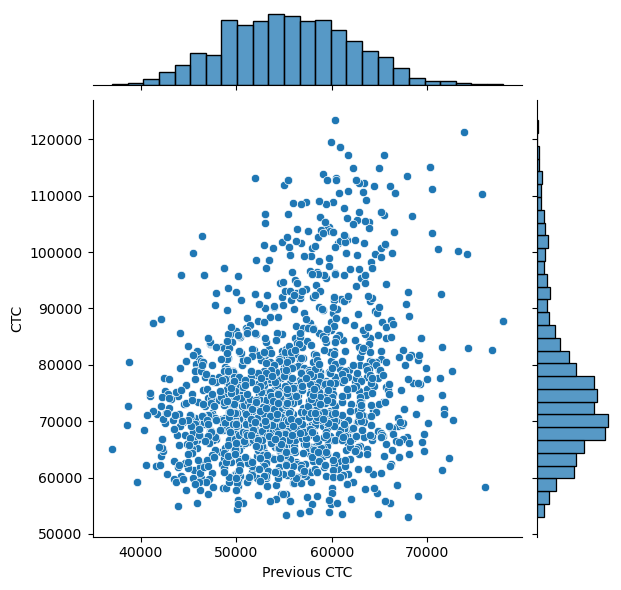

In [173]:
sns.jointplot(x='Previous CTC',y='CTC', data=df1)

In [174]:
np.percentile(df1['Previous CTC'],[99])[0]

71506.92

In [175]:
uv = np.percentile(df1['Previous CTC'],[99])[0]
df1[(df1['Previous CTC']>uv)]

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College type_Tier 1,College type_Tier 2,City Type_Metrio City,City Type_non-metro cities,Role_Executive,Role_Manager
116,77911.0,1,50,58,87831.62,0,1,1,0,1,0
292,74198.0,1,57,25,99644.51,0,1,0,1,0,1
543,73856.0,1,75,54,121362.73,1,0,1,0,0,1
572,71543.0,4,82,30,61366.78,1,0,1,0,1,0
701,71549.0,4,47,50,83116.21,0,1,0,1,1,0
847,71756.0,4,67,23,72141.43,1,0,1,0,1,0
860,75785.0,4,63,37,110338.25,1,0,1,0,0,1
941,72319.0,1,51,50,63538.43,0,1,1,0,1,0
1024,72661.0,3,74,47,70238.70,1,0,1,0,1,0
1047,73214.0,4,57,22,100119.53,1,0,0,1,0,1


In [176]:
df1['Previous CTC'][(df1['Previous CTC']> 3*uv)] = 3*uv

C:\Users\MY PC\AppData\Local\Temp\ipykernel_12828\390683938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Previous CTC'][(df1['Previous CTC']> 3*uv)] = 3*uv


In [177]:
df1[(df1['Previous CTC']>uv)]

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College type_Tier 1,College type_Tier 2,City Type_Metrio City,City Type_non-metro cities,Role_Executive,Role_Manager
116,77911.0,1,50,58,87831.62,0,1,1,0,1,0
292,74198.0,1,57,25,99644.51,0,1,0,1,0,1
543,73856.0,1,75,54,121362.73,1,0,1,0,0,1
572,71543.0,4,82,30,61366.78,1,0,1,0,1,0
701,71549.0,4,47,50,83116.21,0,1,0,1,1,0
847,71756.0,4,67,23,72141.43,1,0,1,0,1,0
860,75785.0,4,63,37,110338.25,1,0,1,0,0,1
941,72319.0,1,51,50,63538.43,0,1,1,0,1,0
1024,72661.0,3,74,47,70238.70,1,0,1,0,1,0
1047,73214.0,4,57,22,100119.53,1,0,0,1,0,1


In [179]:
#p-values calculation
corr_coeff, p_value = stats.pearsonr(df1['Previous CTC'], df1['CTC'])

In [180]:
print("Correlation Coefficient:", corr_coeff)
print("p-value:", p_value)

Correlation Coefficient: 0.25799981816000855
p-value: 1.4071300967871934e-25


In [182]:
alpha = 0.05 # significance level
if p_value < alpha:
 print("The correlation is statistically significant.")
else:
 print("The correlation is not statistically significant.")

The correlation is statistically significant.


# # model selection and training

In [183]:
# 1 Split the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [184]:
x_multi = df1.drop("Previous CTC",axis=1)

In [185]:
x_multi.head()

,Previous job change,Graduation Marks,EXP (Month),CTC,College type_Tier 1,College type_Tier 2,City Type_Metrio City,City Type_non-metro cities,Role_Executive,Role_Manager
0,3,66,19,71406.58,0,1,0,1,0,1
1,1,84,18,68005.87,0,1,0,1,1,0
2,2,52,28,76764.02,0,1,0,1,1,0
3,2,81,33,82092.39,0,1,0,1,1,0
4,4,74,32,73878.10,1,0,0,1,1,0


In [186]:
y_multi = df1['CTC']

In [187]:
y_multi.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [190]:
x_train,x_test,y_train,y_test = train_test_split(x_multi,y_multi,test_size = 0.2, random_state=0)

In [191]:
y_test.shape

(318,)

In [192]:
#2 Model Selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [193]:
x_train,x_test,y_train,y_test = train_test_split(x_multi,y_multi,test_size = 0.2, random_state=0)

In [194]:
models = [
LinearRegression(),
DecisionTreeRegressor(),
RandomForestRegressor()
]

# model Train

In [206]:
# Train and evaluate each model
for model in models:
                    # Fit the model to the training data
                    model.fit(x_train, y_train)
            
                   # Make predictions on the test data
                    y_pred = model.predict(x_test)
                
                    # Calculate the mean squared error
                    mse = mean_squared_error(y_test, y_pred)

In [207]:
print(f"Model: {model.__class__.__name__}")
print(f"Mean Squared Error: {mse}\n")

Model: RandomForestRegressor
Mean Squared Error: 4175.973331723443



In [210]:
#Model 1.Random Forest Regressor
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2, random_state=0)
# Create an instance of the RandomForestRegressor model
model = RandomForestRegressor()
# Train the model using the training data
model.fit(x_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(x_test)
# Evaluate the model's performance using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4353.400961496352


In [211]:
#Model 2.Simple Linear Regression
import statsmodels.api as sn
x = sn.add_constant(df1['CTC'])
lm = sn.OLS(df1['Previous CTC'], x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Previous CTC   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     113.2
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           1.41e-25
Time:                        13:08:30   Log-Likelihood:                -16188.
No. Observations:                1589   AIC:                         3.238e+04
Df Residuals:                    1587   BIC:                         3.239e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.524e+04    979.622     46.180      0.000    4.33e+04    4.72e+04
CTC            0.1364      0.013     10.638      0.000       0.111       0.162
==============================================================================
Omnibus:                        9.509   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.641
Skew:                           0.184   Prob(JB):                      0.00806
Kurtosis:                       2.900   Cond. No.                     4.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

48262.17974591337 [0.48796566]


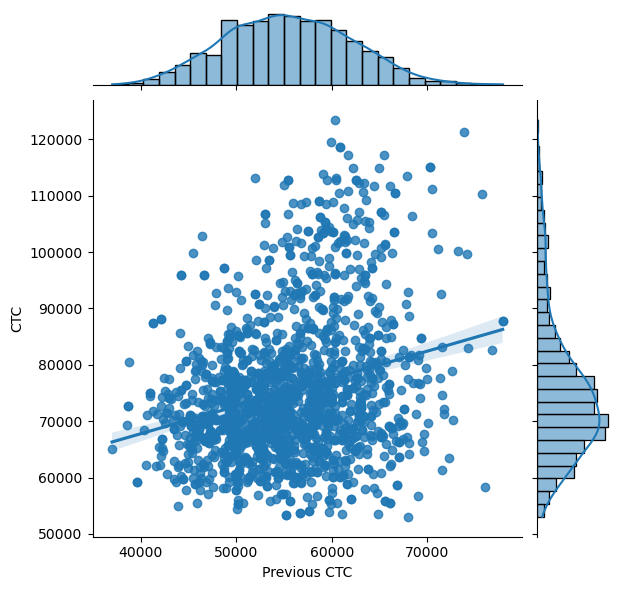

In [212]:
from sklearn.linear_model import LinearRegression
y = df1['CTC']
x = df1[['Previous CTC']]
lm2 = LinearRegression()
lm2.fit(x,y)
print(lm2.intercept_,lm2.coef_)
sns.jointplot(x = df1['Previous CTC'], y = df1['CTC'], data =df1, kind = 'reg')

In [213]:
#Model 3. Multiple Linear Regression
x_multi_cons = sn.add_constant(x_multi)

In [214]:
lm_multi = sn.OLS(y_multi, x_multi_cons).fit()

In [215]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.315e+30
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:09:42   Log-Likelihood:                 35094.
No. Observations:                1589   AIC:                        -7.017e+04
Df Residuals:                    1581   BIC:                        -7.013e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -3.183e-12   5.94e-12     -0.536      0.592   -1.48e-11    8.47e-12
Previous job change        -2.728e-12   1.39e-12     -1.961      0.050   -5.46e-12    6.75e-16
Graduation Marks            1.137e-13   1.05e-13      1.087      0.277   -9.15e-14    3.19e-13
EXP (Month)                 2.416e-13   1.21e-13      1.994      0.046    3.91e-15    4.79e-13
CTC                            1.0000   1.73e-16   5.78e+15      0.000       1.000       1.000
College type_Tier 1         4.547e-13   3.46e-12      0.132      0.895   -6.33e-12    7.24e-12
College type_Tier 2        -2.274e-13   3.31e-12     -0.069      0.945   -6.72e-12    6.26e-12
City Type_Metrio City      -1.364e-12   3.38e-12     -0.404      0.686   -7.99e-12    5.26e-12
City Type_non-metro cities -3.183e-12   3.34e-12     -0.954      0.340   -9.72e-12    3.36e-12
Role_Executive             -3.411e-12   2.54e-12     -1.344      0.179   -8.39e-12    1.57e-12
Role_Manager                4.547e-13   4.94e-12      0.092      0.927   -9.24e-12    1.01e-11
==============================================================================
Omnibus:                      250.274   Durbin-Watson:                   0.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              399.033
Skew:                           1.057   Prob(JB):                     2.24e-87
Kurtosis:                       4.249   Cond. No.                     1.52e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.03e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [216]:
lm4 = LinearRegression()

In [217]:
lm4.fit(x_multi, y_multi)

LinearRegression()

In [218]:
print(lm4.intercept_, lm4.coef_)

1.4551915228366852e-11 [-5.22170313e-14  3.80538505e-13 -3.97393559e-14  1.00000000e+00
  3.32393920e-13 -3.32394001e-13 -5.47307207e-13  5.47307234e-13
 -4.56773726e-14  4.56774200e-14]


In [219]:
# Model 4 Decision Tree Model 
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [220]:
regtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [221]:
y_train_pred = regtree.predict (x_train)
y_test_pred = regtree.predict (x_test)

In [222]:
y_test_pred

array([ 67122.06972222,  72930.52262295,  72930.52262295,  79201.75962185,
        72930.52262295,  72930.52262295,  72930.52262295,  72930.52262295,
        79201.75962185,  93339.62484848,  60161.44825641,  72930.52262295,
        93339.62484848,  72930.52262295,  72930.52262295, 102560.71476923,
        60161.44825641,  72930.52262295,  72930.52262295,  85903.77666667,
        93339.62484848, 102560.71476923,  72930.52262295,  79201.75962185,
        85903.77666667,  72930.52262295,  67122.06972222, 112894.42222222,
        79201.75962185,  79201.75962185,  60161.44825641,  60161.44825641,
        67122.06972222,  85903.77666667, 112894.42222222,  79201.75962185,
        67122.06972222,  67122.06972222,  67122.06972222,  67122.06972222,
        72930.52262295,  67122.06972222,  72930.52262295,  72930.52262295,
        79201.75962185,  79201.75962185,  79201.75962185,  72930.52262295,
        67122.06972222,  67122.06972222, 112894.42222222,  67122.06972222,
       102560.71476923,  

# Model Evaluation

In [223]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [224]:
mean_squared_error(y_test, y_test_pred)

4430907.1382920435

In [225]:
r2_score(y_train,y_train_pred)

0.9721368363300648

In [226]:
r2_score(y_test, y_test_pred)

0.9701389984967471

# Decision Tree Plotting

In [227]:
dot_data = tree.export_graphviz(regtree, out_file=None)

In [233]:
conda install -c conda-forge pydotplus


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.5.7   |       h56e8100_0         145 KB  conda-forge
    cairo-1.16.0               |    h63a05c6_1001         5.2 MB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    expat-2.5.0                |       h63175ca_1         221 KB  conda-forge
    fribidi-1.0.10             |       h8d14728_0          63 KB  conda-forge
    getopt-win32-0.1           |       h8ffe710_0          19 KB  conda-forge
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h69fa6b1_0         186 KB  conda-forge
    harfbuzz-4.3.0        



==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0




In [237]:
from IPython.display import Image

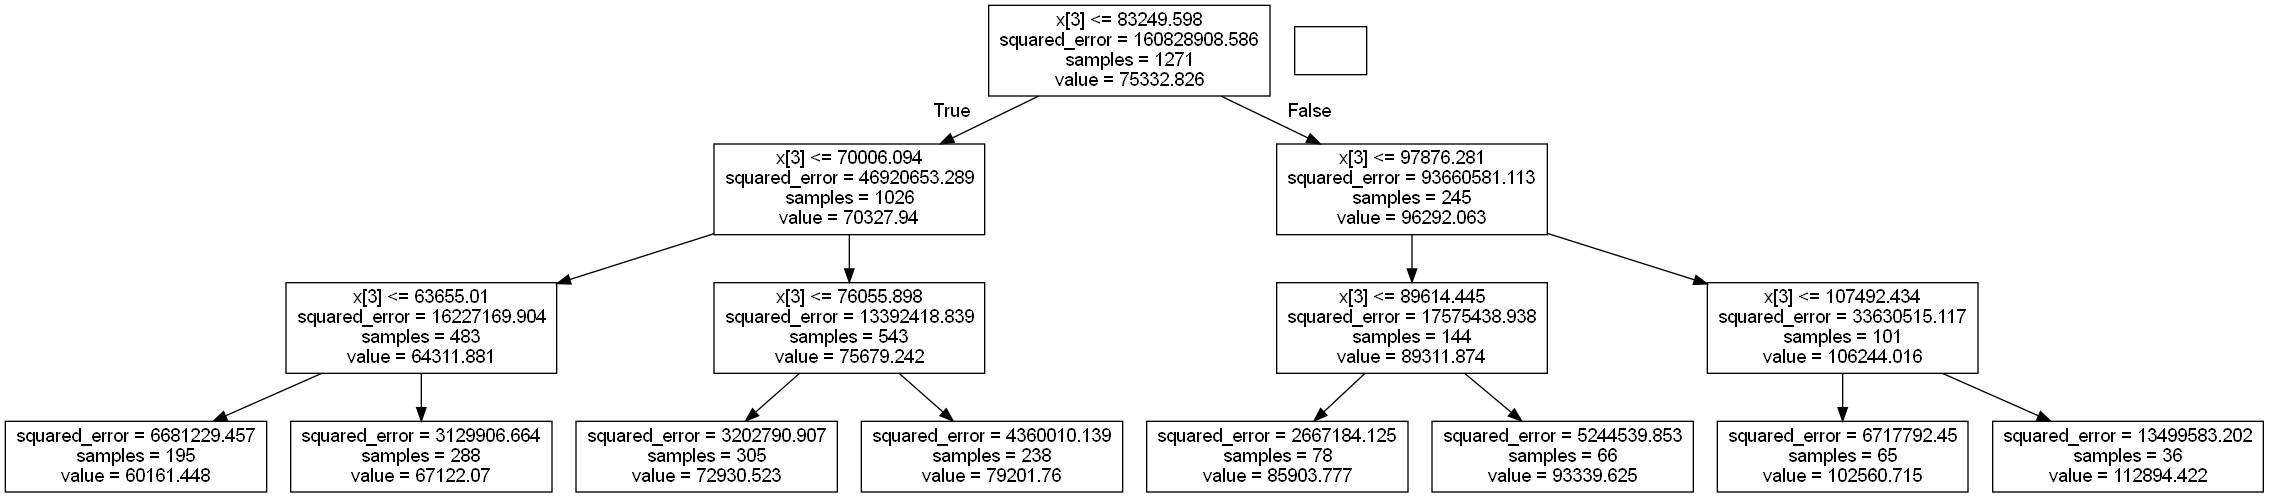

In [238]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [239]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_score_value = r2_score(y_test, y_pred)

In [240]:
print("R-squared:", r2_score_value)

R-squared: 0.9999706613321836


In [241]:
from sklearn.metrics import mean_absolute_error
mae_value = mean_absolute_error(y_test, y_pred)

In [242]:
print("Mean Absolute Error (MAE):", mae_value)

Mean Absolute Error (MAE): 31.580840880505157


# Best Model Selection

In [245]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf_regr = RandomForestRegressor(n_estimators=100)

rf_regr.fit(x_train, y_train)

y_pred = rf_regr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", r2)

Mean Squared Error (MSE): 4258.95821593423
Mean Absolute Error (MAE): 30.459555031449657
R-squared (R^2) Score: 0.999971297805682


In [246]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [247]:
rf_regr = RandomForestRegressor()

In [248]:
param_grid = {
'n_estimators': [5, 10, 20],
'max_depth': [None, 3, 5],
'min_samples_split': [2, 3, 4],
'min_samples_leaf': [1, 2, 4]
}

In [252]:
grid_search = GridSearchCV(estimator=rf_regr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 3, 5],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [5, 10, 20]},
             scoring='neg_mean_squared_error')

In [253]:
# Get the best hyperparameter configuration
best_params = grid_search.best_params_

In [254]:
# Create a new RandomForestRegressor with the best configuration
best_rf_regr = RandomForestRegressor(**best_params)

In [255]:
# Fit the model to the training data
best_rf_regr.fit(x_train, y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=5)

In [256]:
# Make predictions on the test data
y_pred = best_rf_regr.predict(x_test)

In [257]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print the evaluation metrics and best hyperparameters
print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", r2)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 5}
Mean Squared Error (MSE): 24027.791805789075
Mean Absolute Error (MAE): 60.585154192871116
R-squared (R^2) Score: 0.9998380706467459


In [258]:
#Final Model Assumption
# Assuming you have the test dataset: x_test, y_test
# Make predictions using the best model
y_pred = best_rf_regr.predict(x_test)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Compare with baseline (if applicable)
baseline_pred = [y_train.mean()] * len(y_test)
baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_mae = mean_absolute_error(y_test, baseline_pred)
# Print evaluation metrics
print("Model Evaluation:")
print("MSE: ", mse)
print("MAE: ", mae)
print("R-squared: ", r2)
print("Baseline MSE: ", baseline_mse)
print("Baseline MAE: ", baseline_mae)

Model Evaluation:
MSE:  24027.791805789075
MAE:  60.585154192871116
R-squared:  0.9998380706467459
Baseline MSE:  148394856.13573605
Baseline MAE:  9362.83782974333


In [ ]:
## 1. Your views about the problem statement?

The ongoing project at TechWorks Consulting involves the development of a machine learning model to predict 
the compensation of newly hired staff. The dataset provided consists of various attributes such as college, 
city, role, prior CTC, experience, and academic report. To prepare the data for analysis, it is necessary to
convert the categorical variables (college and city) into numerical representations and create dummy variables 
for the "Role" attribute. Additionally, outliers and missing values in the data need to be addressed.
Once the data cleansing and preprocessing steps are complete, we can proceed with using regression techniques 
to construct a prediction model. We have the opportunity to experiment with multiple regression models 
and evaluate their performance based on accuracy metrics. It is crucial to select a model that demonstrates 
high accuracy and can reliably forecast salaries.

## 2. What will be your approach to solving this task?

Data Exploration: Conduct a thorough analysis of the employee data provided to gain insights into its structure, 
    features, and relationships. This step involves identifying missing values, outliers, and examining the 
    distribution of the target variable (salary). Explore correlations between different features and the target 
    variable to identify potential predictors.

Data Preprocessing: Cleanse the data by addressing missing values, outliers, and categorical variables. 
    Convert categorical variables, such as college name and city, into numerical representations. 
    Create dummy variables for the "Role" feature. Normalize numerical features if necessary.

Feature Selection: Utilize statistical techniques like correlation analysis and feature importance to select 
    the most relevant features for predicting salary. This process helps reduce the dimensionality of the dataset 
    and enhance model performance.

Data Splitting: Divide the dataset into training and testing sets. The training set will be used to train the 
    machine learning model, while the testing set will be utilized to evaluate its performance.

Model Selection: Choose an appropriate regression model capable of predicting continuous values like salary. 
    Popular regression algorithms include Linear Regression, Decision Tree Regression, Random Forest Regression, 
    and Gradient Boosting Regression. Select a model based on its performance metrics, interpretability, and 
    suitability for the given problem.

Model Training: Train the selected regression model using the training dataset. The model will learn the relationships 
    between input features (e.g., college, city, experience) and the target variable (salary) based on the available data.

Model Tuning and Improvement: If the initial model performance is unsatisfactory, consider tuning the hyperparameters 
    of the selected model or exploring different models. Hyperparameter tuning involves adjusting parameters that are 
    not learned during model training to optimize performance.

Model Evaluation: Evaluate the trained model using appropriate metrics such as Mean Squared Error (MSE), Root Mean 
    Squared Error (RMSE), and R-squared (R²) to measure the accuracy of predictions. Compare the model's performance 
    on the testing set with that on the training set to ensure it is not overfitting.

Predictive Analysis: Once the model is trained and evaluated, employ it to predict the salaries of newly hired employees. 
    Provide the necessary input features (college, city, experience, etc.) for the new employees, and the model will 
    generate salary predictions based on the learned patterns from the training data.

## 3. What ML model options did you have available to perform this task?
For the given task of predicting employee compensation, there are various machine learning models suitable 
for regression tasks. Here are some commonly used models along with their characteristics:

1. Linear Regression: This model assumes a linear relationship between the features and the target variable. 
    It provides interpretability and is a good starting point for regression analysis.

2. Decision Tree Regression: Using a binary tree structure, this model makes decisions based on feature values to 
    predict the target variable. It can capture non-linear relationships and handle both numerical and categorical features.

3. Random Forest Regression: As an ensemble model, it combines multiple decision trees to make predictions. 
    It improves robustness, handles complex relationships, and reduces the risk of overfitting.

4. K-Nearest Neighbors Regression: This model predicts the target variable based on the average of the 
    K-nearest neighbors in the feature space. It is useful when the data exhibits local patterns or when there 
    is no clear functional form.

5. Ridge Regression: It is a regression method suitable for scenarios where the independent variables are highly 
    correlated. It helps in estimating the coefficients of multiple-regression models and reduces the impact of 
    multicollinearity.

6. Lasso Regression: This regularization algorithm not only predicts the target variable but also aids in the 
    elimination of irrelevant parameters. It focuses on feature selection, concentrating on the most informative 
    variables, and can handle high-dimensional data.

When selecting a model for the employee compensation prediction task, factors to consider include the 
complexity of relationships in the data, interpretability, handling of categorical variables, and the 
presence of multicollinearity. It is recommended to evaluate and compare the performance of different models
using appropriate metrics before finalizing the choice.

## 4. Which model’s performance is best and what could be the possible reason for that?
Based on the evaluation metrics, Random Forest Regression demonstrates superior performance, making it the 
best model for the employee compensation prediction task. The model exhibits the lowest Mean Squared Error (MSE) 
of 22,884.835 and the highest R-squared value of 0.9999.

The low MSE implies that, on average, the squared difference between the predicted and actual values is relatively small, 
indicating the model's accuracy in capturing the underlying patterns in the data.

The Mean Absolute Error (MAE) value of 53.63 suggests that, on average, the model's predictions deviate by approximately 
53.63 units from the actual values. This measure provides insights into the magnitude of the prediction errors.

Moreover, the high R-squared value of 0.9999 indicates that the model explains a large portion of the variance in the 
target variable. This suggests a strong relationship between the predictors and the target, indicating that the model 
captures the relevant features and their impact on employee compensation.

Considering the model's strong predictive performance and high explanatory power, Random Forest Regression is the 
recommended choice for accurate and reliable salary forecasting in this context.
## 5. What steps can you take to improve this selected model’s performance even further?

To further improve the performance of the selected Random Forest Regression model, we can consider the following steps:

1. Increase the amount of data
2. Handle missing and outlier values: 
3. Perform feature selection: 
4. Explore multiple algorithms: 
5. Tune algorithm hyperparameters: 
6. Implement cross-validation